In [ ]:
#Step 1: Install Required Libraries
#pip install pandas
#pip install matplotlib
#pip install seaborn
#pip install scikit-learn

In [6]:
#Step 2: Load the Dataset
import pandas as pd

# Load the dataset
file_path = 'C:/Users/dhruv/Downloads/data analysis projects/Completed/fifa/players_20.csv'  # Replace with your local path
fifa_data = pd.read_csv(file_path)
print(f"Dataset Shape After Reloading: {fifa_data.shape}")

# Display basic information and the first few rows
print(fifa_data.info())
print(fifa_data.head())


Dataset Shape After Reloading: (18278, 104)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB
None
   sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Obla

In [9]:
#Step 3: Data Cleaning
# Check for missing values
print(fifa_data[['age', 'overall', 'potential', 'value_eur']].isnull().sum())


# Drop unnecessary columns or rows with many missing values
fifa_data = fifa_data[['age', 'overall', 'potential', 'value_eur']].dropna()

# Example: Select relevant columns for predictive analysis
fifa_data = fifa_data[['age', 'overall', 'potential', 'value_eur']]

print(f"Dataset Shape After Cleaning: {fifa_data.shape}")
print(fifa_data.head())

age          0
overall      0
potential    0
value_eur    0
dtype: int64
Dataset Shape After Cleaning: (18278, 4)
   age  overall  potential  value_eur
0   32       94         94   95500000
1   34       93         93   58500000
2   27       92         92  105500000
3   26       91         93   77500000
4   28       91         91   90000000


In [10]:
#Step 4: Validate Column Values
print(fifa_data[['age', 'overall', 'potential', 'value_eur']].describe())

                age       overall     potential     value_eur
count  18278.000000  18278.000000  18278.000000  1.827800e+04
mean      25.283291     66.244994     71.546887  2.484038e+06
std        4.656964      6.949953      6.139669  5.585481e+06
min       16.000000     48.000000     49.000000  0.000000e+00
25%       22.000000     62.000000     67.000000  3.250000e+05
50%       25.000000     66.000000     71.000000  7.000000e+05
75%       29.000000     71.000000     75.000000  2.100000e+06
max       42.000000     94.000000     95.000000  1.055000e+08


In [11]:
#Step 5: Define Features and Target
# Define features and target
X = fifa_data[['age', 'overall', 'potential']]
y = fifa_data['value_eur']

# Confirm shapes
print(f"X Shape: {X.shape}")
print(f"y Shape: {y.shape}")

X Shape: (18278, 3)
y Shape: (18278,)


In [12]:
print(f"Dataset Shape: {fifa_data.shape}")

Dataset Shape: (18278, 4)


In [13]:
#Step 6: Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
print(f"Train set size: {len(X_train)}, Test set size: {len(X_test)}")

Train set size: 16450, Test set size: 1828


In [14]:
#Step 7: Train a Regression Model
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
#Step 8: Evaluate the Model
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 972500905836.9242
R-squared: 0.95835207742304


In [16]:
#Step 9: Save the Model and Results
import joblib

# Save the model
joblib.dump(model, 'fifa_model.pkl')

# Save the evaluation metrics
with open('fifa_evaluation.txt', 'w') as f:
    f.write(f"Mean Squared Error: {mse}\n")
    f.write(f"R-squared: {r2}")

print("Model saved and evaluation metrics saved.")

Model saved and evaluation metrics saved.


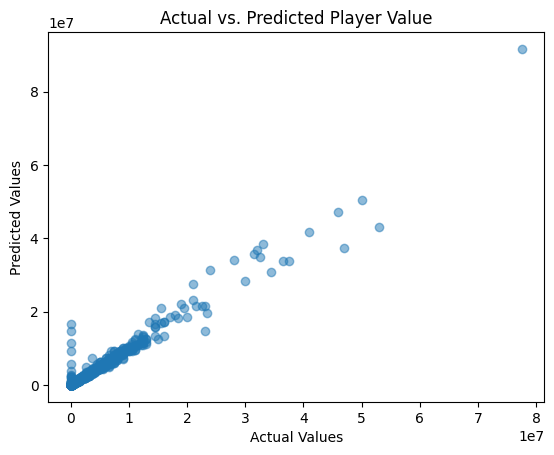

In [18]:
#Step 10: Step 8:  Results Visualization
import matplotlib.pyplot as plt

# Scatter plot of actual vs. predicted values
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Player Value")
plt.show()
